Elaborar un código que utilice la librería Sympy de Python para resolver los dos problemas de Sturm-Liouville que ya hemos estudiado:

$$1) X'' + kX = 0,   X(0)=X(1)=0$$
$$2) X'' + kX = 0,   X'(0)=X'(1)=0$$

Primero empecemos con
$$1) X'' + kX = 0,   X(0)=X(1)=0$$

In [10]:
from sympy import symbols, Function, dsolve, Eq, Derivative, sin, pi, solve, simplify
from sympy.abc import x, n

# Definimos los símbolos
k = symbols('k', real=True, positive=True)
X = Function('X')

# Ecuación diferencial: X'' + kX = 0
ode = Eq(Derivative(X(x), x, x) + k * X(x), 0)

# Resolvemos la ecuación diferencial
sol = dsolve(ode, X(x))
print("Solución general de la EDO:")
print(sol)

# La solución tiene la forma: X(x) = C1*sin(sqrt(k)*x) + C2*cos(sqrt(k)*x)
# Aplicamos las condiciones de frontera: X(0) = 0 y X(1) = 0
from sympy import sqrt, cos

C1, C2 = symbols('C1 C2')
X_sol = C1 * sin(sqrt(k)*x) + C2 * cos(sqrt(k)*x)

# Condición de frontera X(0) = 0
bc1 = Eq(X_sol.subs(x, 0), 0)
# Esto implica que C2 = 0
C2_val = solve(bc1, C2)[0]

# Sustituimos C2 = 0 en la solución
X_sol = X_sol.subs(C2, C2_val)

# Condición de frontera X(1) = 0
bc2 = Eq(X_sol.subs(x, 1), 0)
# Esto implica sin(sqrt(k)) = 0 => sqrt(k) = n*pi => k = (n*pi)^2
k_val = solve(bc2, k)

print("\nCondición de frontera en x=1:")
print(bc2)

print("\nValores propios (k):")
k_n = (n*pi)**2
print(f"kₙ = (nπ)²")

print("\nFunciones propias (Xₙ):")
Xn = simplify(X_sol.subs(C1, 1))  # Normalizamos C1 = 1
print(f"Xₙ(x) = sin(nπx)")

Solución general de la EDO:
Eq(X(x), C1*sin(sqrt(k)*x) + C2*cos(sqrt(k)*x))

Condición de frontera en x=1:
Eq(C1*sin(sqrt(k)), 0)

Valores propios (k):
kₙ = (nπ)²

Funciones propias (Xₙ):
Xₙ(x) = sin(nπx)


A continuacion se presentara un codigo para graficar la solucion de la ecuación diferencial de Sturm-Liouville

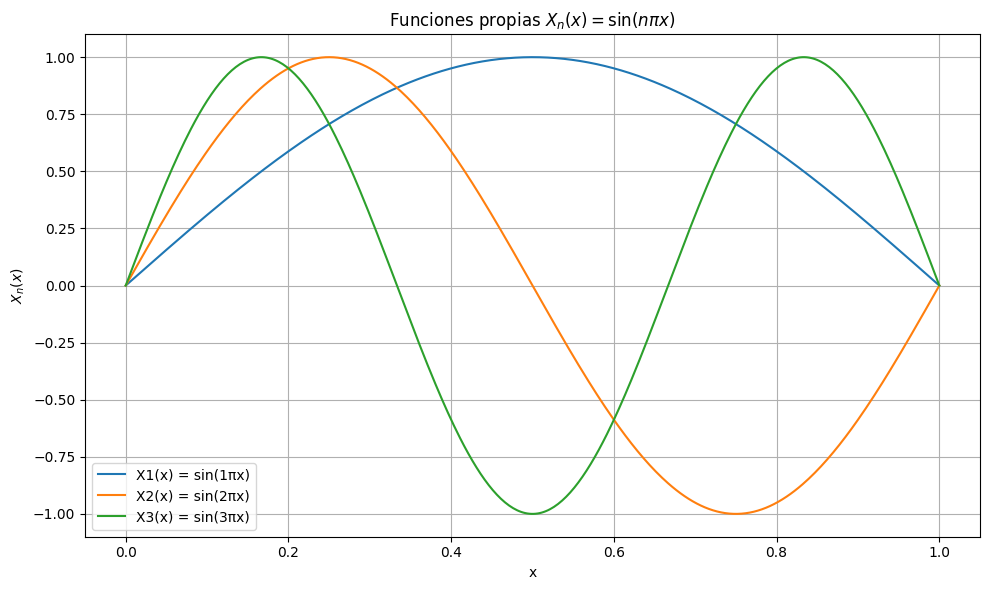

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, pi, sin, lambdify
from sympy.abc import x, n

# Definimos la función propia general: Xn(x) = sin(n * pi * x)
Xn_expr = sin(n * pi * x)

# Convertimos la expresión simbólica a función numérica para graficar
Xn_func = lambdify((n, x), Xn_expr, modules='numpy')

# Valores de n que queremos graficar
n_values = [1, 2, 3]
x_vals = np.linspace(0, 1, 400)

# Graficamos las funciones propias
plt.figure(figsize=(10, 6))
for ni in n_values:
    y_vals = Xn_func(ni, x_vals)
    plt.plot(x_vals, y_vals, label=f"X{ni}(x) = sin({ni}πx)")

plt.title("Funciones propias $X_n(x) = \\sin(n\\pi x)$")
plt.xlabel("x")
plt.ylabel("$X_n(x)$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Finalmente,

$$2) X'' + kX = 0,   X'(0)=X'(1)=0$$

In [4]:
from sympy import symbols, Function, dsolve, Eq, Derivative, sin, cos, sqrt, solve, simplify, pi
from sympy.abc import x

# Símbolos
k = symbols('k', real=True, positive=True)
X = Function('X')

# EDO: X'' + kX = 0
ode = Eq(Derivative(X(x), x, x) + k * X(x), 0)

# Resolver la EDO
sol = dsolve(ode, X(x))
print("Solución general:")
print(sol)

# Forma de la solución: X(x) = C1*sin(sqrt(k)*x) + C2*cos(sqrt(k)*x)
C1, C2 = symbols('C1 C2')
X_sol = C1 * sin(sqrt(k)*x) + C2 * cos(sqrt(k)*x)

# Derivada de la solución
X_prime = X_sol.diff(x)

# Condiciones de frontera: X'(0) = 0 y X'(1) = 0
bc1 = Eq(X_prime.subs(x, 0), 0)  # => C1 * sqrt(k) = 0 => C1 = 0
C1_val = solve(bc1, C1)[0]
X_sol = X_sol.subs(C1, C1_val)

# Segunda condición: X'(1) = 0
bc2 = Eq(X_sol.diff(x).subs(x, 1), 0)
# Esto nos lleva a: sin(sqrt(k)) = 0 => sqrt(k) = n*pi => k = (n*pi)^2
k_expr = solve(bc2, k)

print("\nCondición de frontera en x=1:")
print(bc2)

print("\nValores propios (k):")
print("kₙ = (nπ)²")

print("\nFunciones propias (Xₙ):")
print("Xₙ(x) = cos(nπx)")


Solución general:
Eq(X(x), C1*sin(sqrt(k)*x) + C2*cos(sqrt(k)*x))

Condición de frontera en x=1:
Eq(-C2*sqrt(k)*sin(sqrt(k)), 0)

Valores propios (k):
kₙ = (nπ)²

Funciones propias (Xₙ):
Xₙ(x) = cos(nπx)


A continuacion se presentara un codigo para graficar la solucion de la ecuación diferencial de Sturm-Liouville

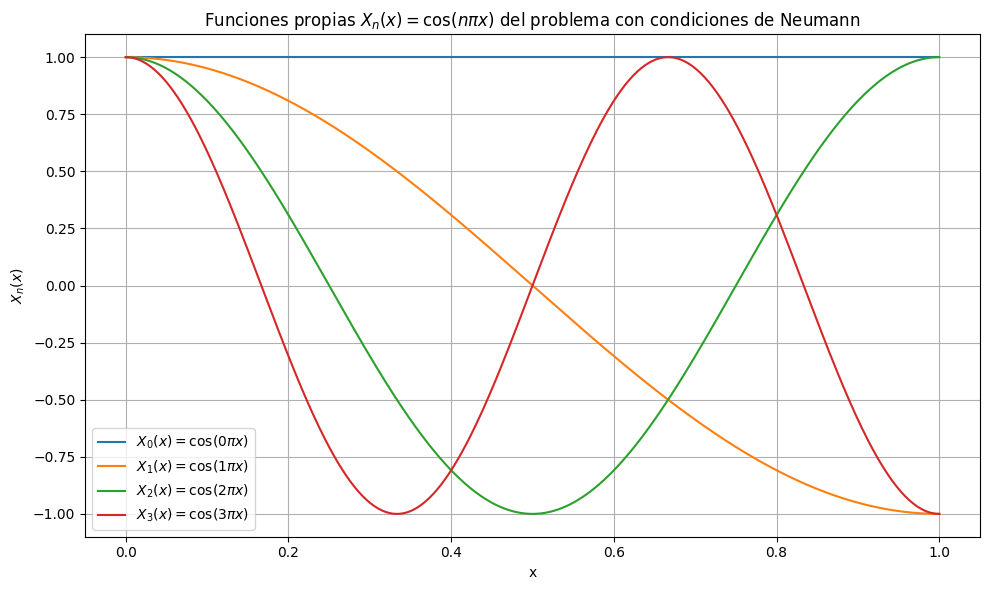

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import cos, pi, lambdify
from sympy.abc import x, n

# Definimos la función propia general: Xn(x) = cos(n * pi * x)
Xn_expr = cos(n * pi * x)
Xn_func = lambdify((n, x), Xn_expr, modules='numpy')

# Dominio de x
x_vals = np.linspace(0, 1, 400)

# Valores de n a graficar (incluye n=0 para la constante)
n_values = [0, 1, 2, 3]

# Crear la gráfica
plt.figure(figsize=(10, 6))
for ni in n_values:
    y_vals = Xn_func(ni, x_vals)
    plt.plot(x_vals, y_vals, label=f"$X_{ni}(x) = \\cos({ni}\\pi x)$")

plt.title("Funciones propias $X_n(x) = \\cos(n\\pi x)$ del problema con condiciones de Neumann")
plt.xlabel("x")
plt.ylabel("$X_n(x)$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
